# A Brief EDA and a Benchmark with Logistic Regression

The objective of this study is to have a first look of the data, to identify interesting points of the data, and perform a benchmark run with raw features and logistic regression

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def warn(*args, **kwargs): pass
import warnings
warnings.warn = warn

%matplotlib inline

# from sklearn.preprocessing import LabelEncoder
# from sklearn.cross_validation import StratifiedShuffleSplit

train = pd.read_csv('../input/train.csv').drop('id',axis=1)
test = pd.read_csv('../input/test.csv')
test_ids = test['id']
test.drop('id',axis=1,inplace=True)

All features are continuous, and can be clustered in three groups: margin, shape, and texture. Each group has 64 features.

In [2]:
train.columns

Index(['species', 'margin1', 'margin2', 'margin3', 'margin4', 'margin5',
       'margin6', 'margin7', 'margin8', 'margin9',
       ...
       'texture55', 'texture56', 'texture57', 'texture58', 'texture59',
       'texture60', 'texture61', 'texture62', 'texture63', 'texture64'],
      dtype='object', length=193)

There is no null value in train and test data.

In [3]:
print(train.isnull().any().any())
print(test.isnull().any().any())

False
False


# Explore 'species'

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [5]:
species = train['species']
train.drop('species',axis=1,inplace=True)
y_train = le.fit_transform(species)

There are 99 categories in train, and we have 10 observations for each category.

There are ['Acer_Opalus' 'Pterocarya_Stenoptera' 'Quercus_Hartwissiana'
 'Tilia_Tomentosa' 'Quercus_Variabilis' 'Magnolia_Salicifolia'
 'Quercus_Canariensis' 'Quercus_Rubra' 'Quercus_Brantii' 'Salix_Fragilis'
 'Zelkova_Serrata' 'Betula_Austrosinensis' 'Quercus_Pontica'
 'Quercus_Afares' 'Quercus_Coccifera' 'Fagus_Sylvatica' 'Phildelphus'
 'Acer_Palmatum' 'Quercus_Pubescens' 'Populus_Adenopoda' 'Quercus_Trojana'
 'Alnus_Sieboldiana' 'Quercus_Ilex' 'Arundinaria_Simonii' 'Acer_Platanoids'
 'Quercus_Phillyraeoides' 'Cornus_Chinensis' 'Liriodendron_Tulipifera'
 'Cytisus_Battandieri' 'Rhododendron_x_Russellianum' 'Alnus_Rubra'
 'Eucalyptus_Glaucescens' 'Cercis_Siliquastrum' 'Cotinus_Coggygria'
 'Celtis_Koraiensis' 'Quercus_Crassifolia' 'Quercus_Kewensis'
 'Cornus_Controversa' 'Quercus_Pyrenaica' 'Callicarpa_Bodinieri'
 'Quercus_Alnifolia' 'Acer_Saccharinum' 'Prunus_X_Shmittii' 'Prunus_Avium'
 'Quercus_Greggii' 'Quercus_Suber' 'Quercus_Dolicholepis' 'Ilex_Cornuta'
 'Tilia_Oliveri' 'Quercus_Se

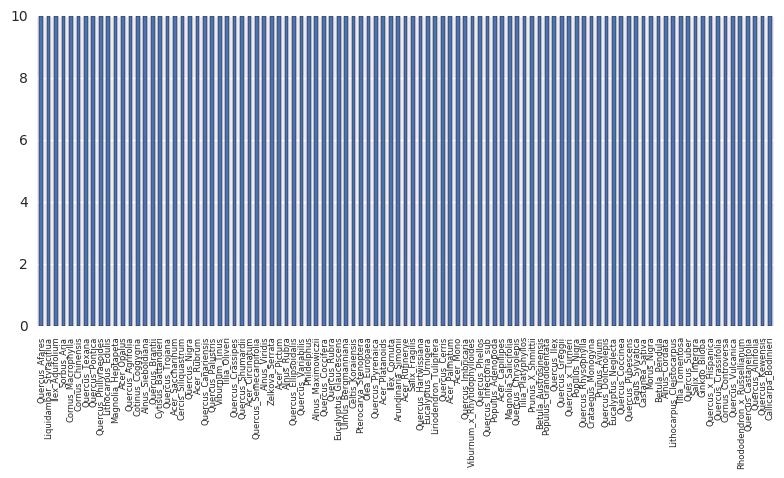

In [6]:
print('There are {} categories in the label, each category has 10 observations\n'.format(species.unique()))
fig = plt.figure(figsize=(9.5,4));
ax = fig.add_subplot(1,1,1)
species.value_counts().plot(kind='bar');
ax.tick_params(axis='x',labelsize=6);

# Univariable Analysis 

In [7]:
mColumns = [col for col in train.columns if col.startswith('margin')]
sColumns = [col for col in train.columns if col.startswith('shape')]
tColumns = [col for col in train.columns if col.startswith('texture')]

In [8]:
def setBoxplot(ax,ylim):
    ax.set_ylim(ylim);
    ax.tick_params(axis='y',labelsize=6);
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90,fontsize=7);

Almost all the features are skewed to the high end, and the interquartile of most of the margin features are below 0.03. However, the spread of values of some features are much wider than others, and some are much narrower.

Wide:
margin2, margin3, margin7, margin11, margin13, margin21, margin29, margin33, margin38, margin45, margin47, margin48, margin51, margin53, margin59, margin63

Narrow:
margin9, margin14, margin16, margin22, margin27, margin34, margin52, margin56, margin61, margin62, margin64

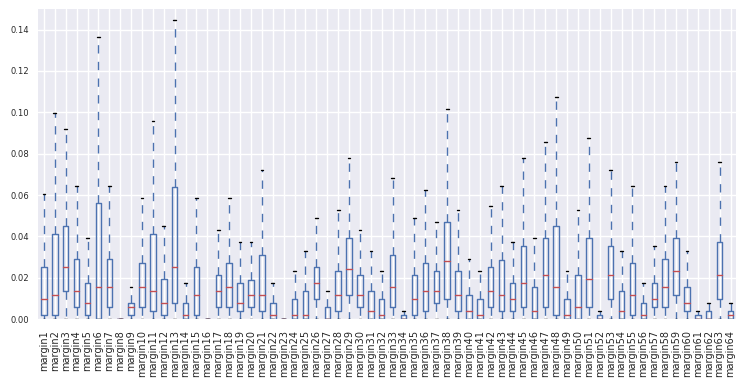

In [9]:
fig = plt.figure(figsize = (9,4));
ax = fig.add_subplot(1,1,1);
train[mColumns].boxplot(whis=1.5);
setBoxplot(ax,[0,0.15])

Take a look at the histograms of a feature with wide range and a feature with narrow range, we can see these are sparse vectors. Most values are zeros. 

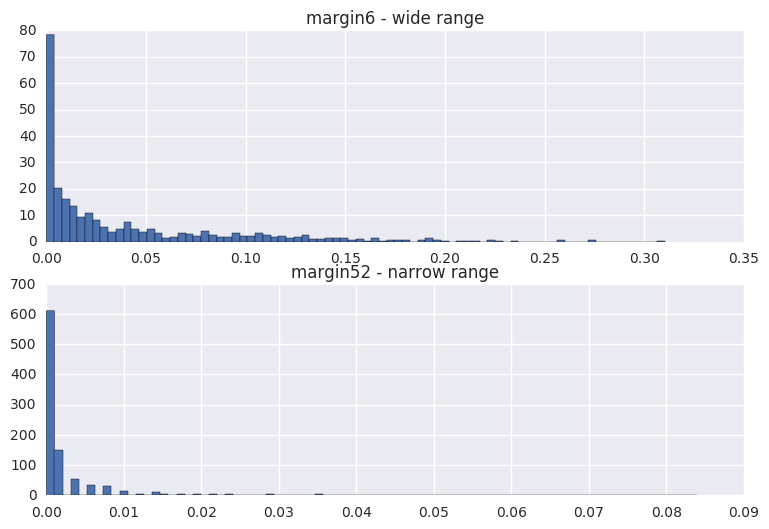

In [10]:
fig=plt.figure(figsize=(9,6))
ax = fig.add_subplot(2,1,1)
train['margin6'].hist(bins=80,normed=True);
ax.set_title('margin6 - wide range')
ax = fig.add_subplot(2,1,2)
train['margin52'].hist(bins=80,normed=True);
ax.set_title('margin52 - narrow range');

The interquartile ranges of shape features are below 0.0015, so all these features must be standardized before sending to the classifier. The shape of histograms of most of the shape features are symetrical, and the skew is not obvious. Medians and upper whiskers vary continuously from one variable to another, which is different from the margin features and the texture features. In addition, these features are dense vectors without many zeros.

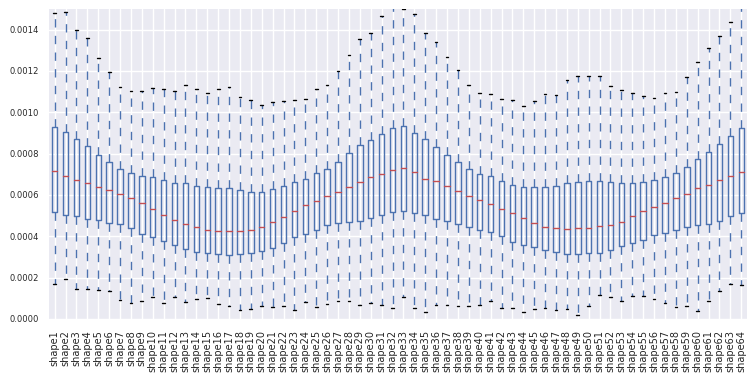

In [11]:
fig = plt.figure(figsize = (9,4));
ax = fig.add_subplot(1,1,1);
train[sColumns].boxplot(whis=1.5);
setBoxplot(ax,[0,0.0015])

These are sparse vectors too. Most of the interquartile ranges of texture features are below 0.03. Similar to the margin features, histograms of texture features are skewed to the high end. Some of these features have wider ranges, and some of them have narrower ranges. 

Wide Range: texture5, texture8, texture15, texture19, texture21, texture26, texture27, texture29, texture31, texture34, texture36, texture38, texture39, texture40, texture44, texture46, texture54-56, texture60-61, texture64

Narrow Range: texture12, texture16, texture18, texture32, texture42

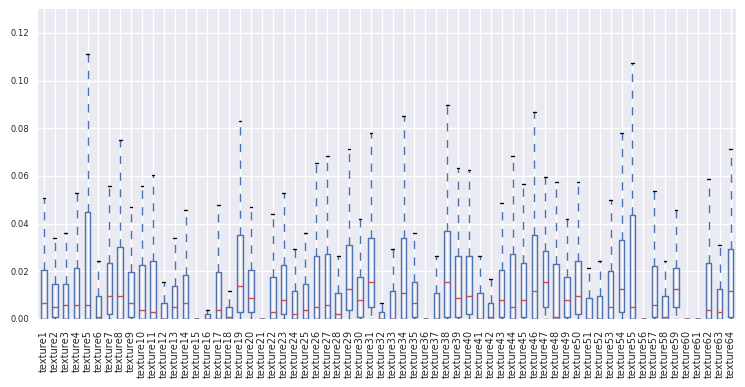

In [12]:
fig = plt.figure(figsize = (9,4));
ax = fig.add_subplot(1,1,1);
train[tColumns].boxplot(whis=1.5);
setBoxplot(ax,[0,0.13])

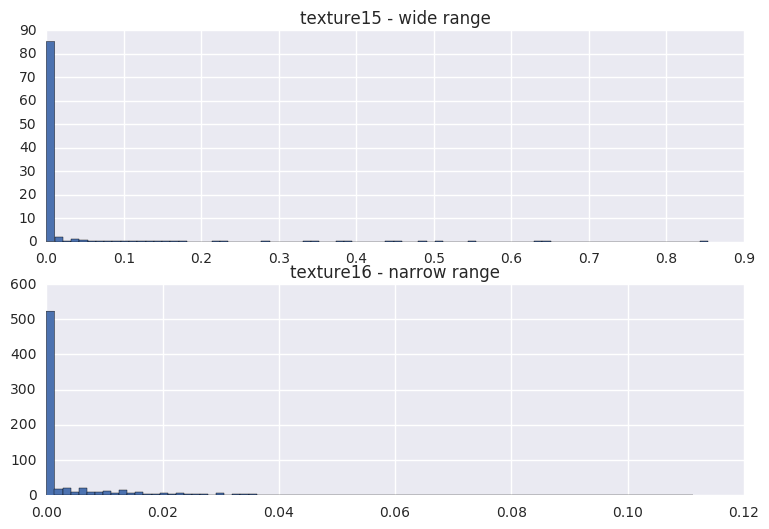

In [13]:
fig=plt.figure(figsize=(9,6))
ax = fig.add_subplot(2,1,1)
train['texture15'].hist(bins=80,normed=True);
ax.set_title('texture15 - wide range')
ax = fig.add_subplot(2,1,2)
train['texture16'].hist(bins=80,normed=True);
ax.set_title('texture16 - narrow range');

# Bivariate Analysis

In [14]:
def correlation_matrix(df,ax1):
    import numpy as np
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    cmap = cm.get_cmap('RdYlBu', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap, vmin=-1.0, vmax=1.0)
    ax1.grid(True)
    labels = df.columns
    ax1.set_xticks(range(0,len(labels)))
    ax1.set_xticklabels(labels,fontsize=7,rotation=90)
    ax1.set_yticks(range(0,len(labels)))
    ax1.set_yticklabels(labels,fontsize=7)
    cbar = fig.colorbar(cax)
    cbar.ax.tick_params(labelsize=7)
    ax1.grid(b=False)

Moderate positive and negative correlation among neighbouring features is observed as blocks in the correlation matrix.

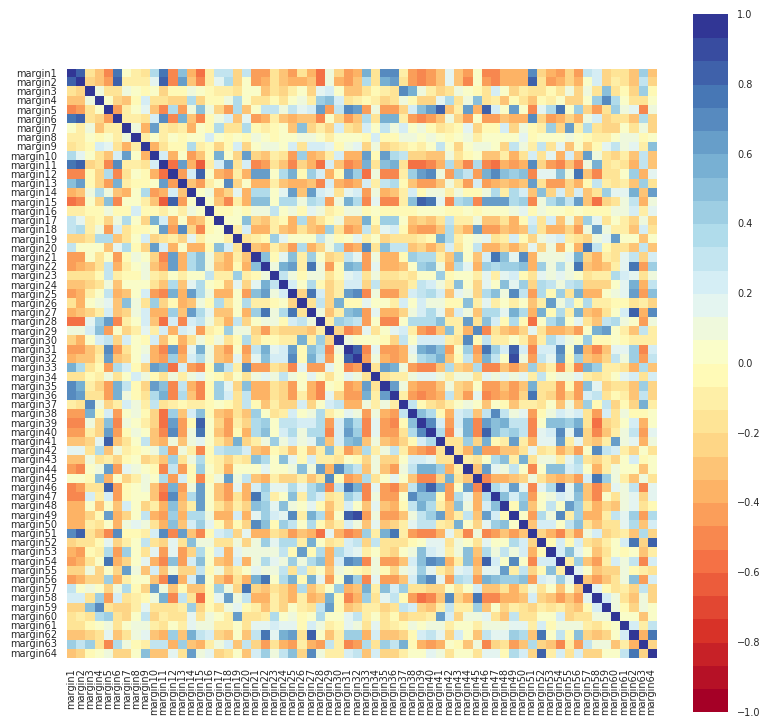

In [15]:
# correlation matrix for margin features
fig = plt.figure(figsize=(9.5,9))
ax = fig.add_subplot(1,1,1)
correlation_matrix(train[mColumns],ax)

High positive correlation is observed among shape features.

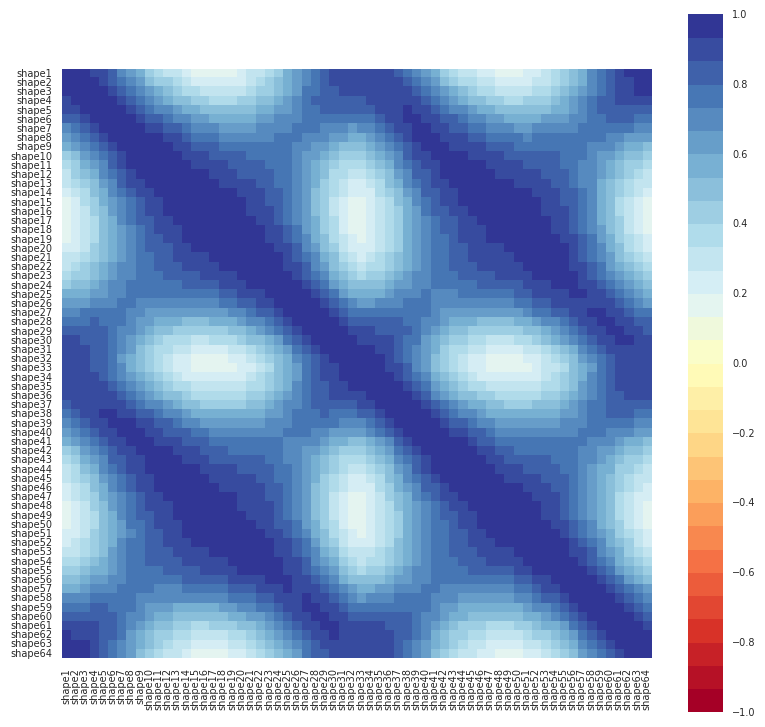

In [16]:
# correlation matrix for shape features
fig = plt.figure(figsize=(9.5,9))
ax = fig.add_subplot(1,1,1)
correlation_matrix(train[sColumns],ax)

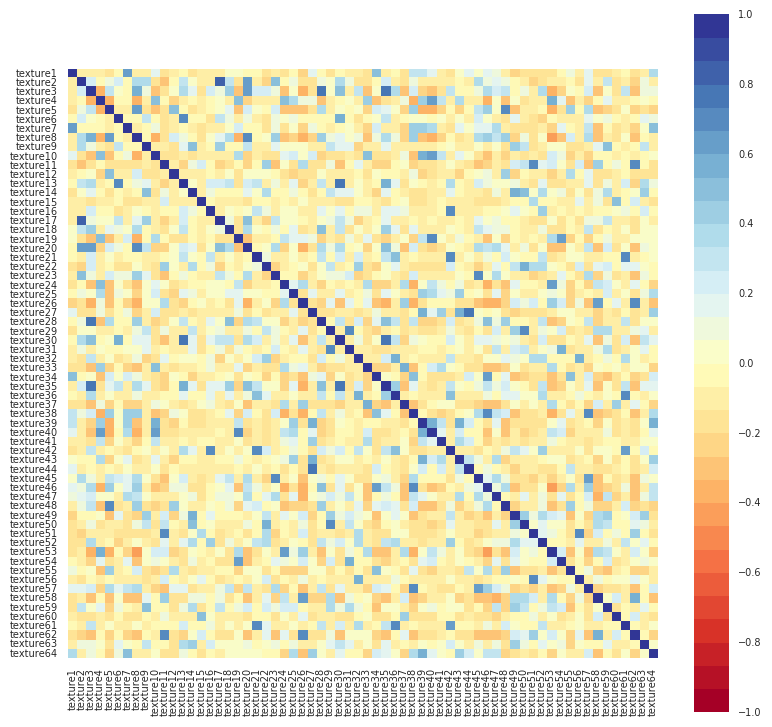

In [17]:
# correlation matrix for texture features
fig = plt.figure(figsize=(9.5,9))
ax = fig.add_subplot(1,1,1)
correlation_matrix(train[tColumns],ax)

# Normalize the Sparse Features

In [18]:
from sklearn.preprocessing import MaxAbsScaler

In [19]:
x_data = np.vstack([train,test])
mas = MaxAbsScaler()
n_x_data = mas.fit_transform(x_data)
print(n_x_data.shape)
n_x_data

(1584, 192)


array([[ 0.08888282,  0.11428711,  0.13953682, ...,  0.01298739,
         0.        ,  0.16994177],
       [ 0.06666212,  0.        ,  0.18604513, ...,  0.00259854,
         0.44943277,  0.1503313 ],
       [ 0.06666212,  0.04762044,  0.11627672, ...,  0.        ,
         0.23595738,  0.01961047],
       ..., 
       [ 0.19999772,  0.14285645,  0.09302256, ...,  0.        ,
         0.49438525,  0.0457533 ],
       [ 0.15555631,  0.04762044,  0.36046318, ...,  0.        ,
         0.13483443,  0.12418847],
       [ 0.        ,  0.57143554,  0.        , ...,  0.04155806,
         0.        ,  0.11764942]])

# Split the dataset - raw features

In [20]:
n_x_test = n_x_data[len(species):,:]
n_x_train = n_x_data[0:len(species),:]

In [21]:
print(n_x_train.shape)
print(y_train.shape)
print(n_x_test.shape)

(990, 192)
(990,)
(594, 192)


In [22]:
# the best model get logloss = 0.04 or so with 'C':2000 and 'tol':0.0001
from sklearn.linear_model import LogisticRegression
from sklearn.grid_search import GridSearchCV
params = {'C':[0.001, 0.01, 1, 10, 100, 500, 1000, 2000], 'tol': [0.0001, 0.001, 0.005]}
log_reg = LogisticRegression(solver='newton-cg', multi_class='multinomial')
clf = GridSearchCV(log_reg, params, scoring='log_loss', refit='True', n_jobs=1, cv=5)
clf.fit(n_x_train, y_train)

print("best params: " + str(clf.best_params_))
for params, mean_score, scores in clf.grid_scores_:
    print("%0.3f (+/-%0.03f) for %r" % (mean_score, scores.std(), params))
    print(scores)

best params: {'tol': 0.0001, 'C': 2000}
-4.573 (+/-0.000) for {'tol': 0.0001, 'C': 0.001}
[-4.57307055 -4.57297781 -4.57294685 -4.57285754 -4.57303265]
-4.573 (+/-0.000) for {'tol': 0.001, 'C': 0.001}
[-4.57307087 -4.57297804 -4.57294712 -4.5728578  -4.57303293]
-4.573 (+/-0.000) for {'tol': 0.005, 'C': 0.001}
[-4.57307069 -4.57297772 -4.57294684 -4.5728575  -4.5730327 ]
-4.383 (+/-0.001) for {'tol': 0.0001, 'C': 0.01}
[-4.38344878 -4.38256223 -4.38233984 -4.38147271 -4.38305561]
-4.383 (+/-0.001) for {'tol': 0.001, 'C': 0.01}
[-4.38344878 -4.38256223 -4.38234297 -4.38147271 -4.38305656]
-4.383 (+/-0.001) for {'tol': 0.005, 'C': 0.01}
[-4.38344878 -4.38256938 -4.38234518 -4.38147689 -4.38306341]
-0.848 (+/-0.013) for {'tol': 0.0001, 'C': 1}
[-0.85735625 -0.8345359  -0.86484904 -0.85187524 -0.83173703]
-0.848 (+/-0.013) for {'tol': 0.001, 'C': 1}
[-0.85735325 -0.83454268 -0.86484846 -0.85187617 -0.83173741]
-0.848 (+/-0.013) for {'tol': 0.005, 'C': 1}
[-0.85731201 -0.83456611 -0.8648560

In [23]:
y_test_raw = clf.predict_proba(n_x_test)

In [24]:
submission = pd.DataFrame(y_test_raw, index=test_ids, columns=le.classes_)
submission.to_csv('./submission_raw.csv')